In [31]:
"""
1. Pre-Process the dataset
2. Defining the architectiure 
3. Initialization
4. Forward prop 
5. Compute loss 
6. Backward prop
7. Update parameters
8. Repeat steps 4-7
9. Predict


Architecture:
4-4-1
"""

print("Layout for this notebook")

Layout for this notebook


In [32]:
import numpy as np
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt

OHE = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

Loading the dataset

In [33]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
# print(iris.metadata) 
  
# variable information 
# print(iris.variables) 

Pre-Processing the dataset

In [34]:
"""
1. Normalize X
2. One hot encode y
3. Create the train and test split
"""

'\n1. Normalize X\n2. One hot encode y\n3. Create the train and test split\n'

In [35]:
# 1. Normalize X

X = scaler.fit_transform(X)
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [36]:
# 2. One hot encode y

y = np.array(y['class'])
y = y.reshape(-1, 1)
y = OHE.fit_transform(y)

In [37]:
# 3. Train-test split
# 80-20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Helper Functions

In [38]:
# 1. Defining the architecture

n_x = 4 # no. of input variables
n_h = 4 # no. of hidden units
n_y = 1 # no. of output units

In [39]:
# 2. Initialization

"""
The reason for initializing such small weights is because it helps to some extent in avoiding exploding/vanishing gradients.
Although this is more of a problem only when a deep neural network is being implemented.

Additionally, you are able to also train the model faster because if the x value is large/small then the tanh or sigmoid due to 
having small gradients at extremems, results in smaller steps being taken to the optimum value. But this problem is addressed 
to some extent using ReLu function.

There are different recommended initializations depending on which activation function you use. 
"""

def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    
    return parameters

In [40]:
# Define the softmax function

""" 
axis = 0 is row wise addition.

Because each column in x is an example, we are performing softmax according to that. When we breakdown softmax
we see that each e^x[i,j] needs to be divided by that x[i,j]'s whole example sum of e^x[i,j]. So for this purpose
it makes sense to use np.sum(axis = 0).
"""

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0) 

In [41]:
# 3. Forward prop

"""
tanh is almost always better than sigmoid. The mean of tanh function values has a mean is closer to 0. This will 
make our learning algorithm center the data, making the learning for the next layer little more easier.

The tanh function is almost always strictly superior than sigmoid except for the output layer when you are performing binary
classification. 

The only time you might need a linear activation function (no activation) is when your y values can be large values such as
house prices from $0 - $1000000.
"""

# Try experimenting with ReLu function

def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = softmax(Z2)  
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [42]:
# 4. Compute cost

# Why can't np.dot be used here?

def compute_cost(Y, A2):
    m = Y.shape[1]
    
    cost = -(1/m) * np.sum(np.sum(np.multiply(Y, np.log(A2))))
    
    # Manually calculate a sample to see why cost can't be calculated using dot product
    
    return cost

In [43]:
# 5. Backward prop

def backward_propagation(parameters, cache, X, Y):
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    m = Y.shape[1]
    
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads  
    

In [44]:
# 6. Update parameters

def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    dW2 = grads["dW2"]
    db1 = grads["db1"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

Integrating everything

In [45]:
# 7. Repeat steps 3-6

def nn_model(X, Y, n_h, learning_rate, num_iterations = 10000, print_cost=False):
    n_x = 4
    n_y = 3
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]  
    
    for i in range(0, num_iterations+1):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(Y, A2)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        
        if print_cost and i % 1000 == 0:
            print("The cost at iteration %i: %f" %(i, cost))
        if not print_cost and i == num_iterations:
            return cost, parameters
    
    return parameters

In [46]:
parameters = nn_model(X_train.T, y_train.T, 4, 1.3, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

The cost at iteration 0: 1.098544
The cost at iteration 1000: 0.043742
The cost at iteration 2000: 0.039555
The cost at iteration 3000: 0.035645
The cost at iteration 4000: 0.032252
The cost at iteration 5000: 0.028670
The cost at iteration 6000: 0.027180
The cost at iteration 7000: 0.026242
The cost at iteration 8000: 0.025557
The cost at iteration 9000: 0.025018
The cost at iteration 10000: 0.024577
W1 = [[-1.39277452 -0.69780135  0.74157007 -6.59100937]
 [-1.243281   -5.3607722   4.18658581  1.60020815]
 [-2.14156546  0.04510588  7.59517427  0.54309811]
 [-0.72343425  0.58492489 -1.50452407 -1.35147544]]
b1 = [[ 5.23689012]
 [-3.48557779]
 [-3.39592207]
 [-1.32744407]]
W2 = [[ 1.82882463 -3.38583997 -2.57024476  5.43551334]
 [ 3.97694555 -1.9628381  -2.69671769 -4.17666579]
 [-5.8137168   5.34474399  5.27259821 -1.23927899]]
b2 = [[ 0.52282712]
 [ 0.18639353]
 [-0.70922065]]


Prediction & Post training analysis

In [47]:
# 8. Predict

def predict(parameters, X, y):
    # Get predictions by using the final weights on a forward pass
    A2, cache = forward_propagation(X, parameters)
    predictions = np.argmax(A2, axis=0) 

    # Get the true values
    y_values = np.argmax(y, axis=1)
    
    # Check how many of them are same and compute the average 
    accuracy = np.mean(predictions == y_values) * 100
    
    return accuracy

In [48]:
train_accuracy = predict(parameters, X_train.T, y_train)
print(f"{train_accuracy:.2f}% accuracy")

99.17% accuracy


In [49]:
test_accuracy = predict(parameters, X_test.T, y_test)
print(f"{test_accuracy:.2f}% accuracy")

100.00% accuracy


Let's perform a comparitive analysis on the different choices of hyperparameters and observe how it affects the model's performance

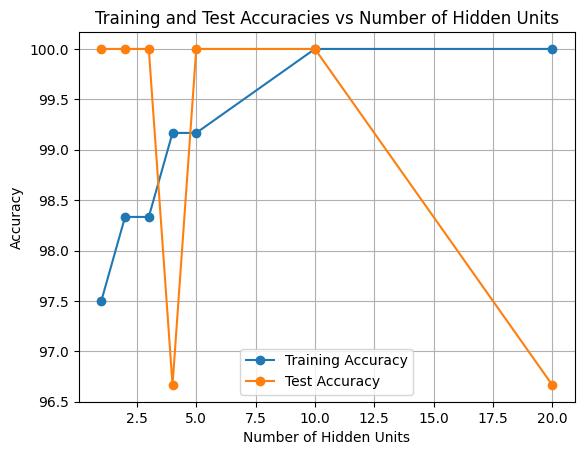

In [50]:
# Check different choices of number of hidden units

hidden_units_choices = [1, 2, 3, 4, 5, 10, 20]
training_accuracies = []; test_accuracies = []

for no_of_hidden_units in hidden_units_choices:
    
    cost, parameters = nn_model(X_train.T, y_train.T, no_of_hidden_units, 1.3, num_iterations=10000, print_cost=False)
    training_accuracies.append(predict(parameters, X_train.T, y_train))
    test_accuracies.append(predict(parameters, X_test.T, y_test))

plt.plot(hidden_units_choices, training_accuracies, label='Training Accuracy', marker='o')
plt.plot(hidden_units_choices, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Hidden Units')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies vs Number of Hidden Units')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
"""
Generally we want our hyperparameters chosen such that it doesn't overfit and it generalizes well on unseen data.
Here we can see that the model performs best with number of hidden units being 4 or less. By going above that \
    we are overfitting the dataset. And even though in some cases it overfits the training data, it still gets 
    good performance on the test as well. But the model gets away with this because of the small dataset and
    relatively simpler problem. When we go for larger datasets and more complex problems, the overfitting 
    will have a bigger impact on the test set. 
"""

"\nGenerally we want our hyperparameters chosen such that it doesn't overfit and it generalizes well on unseen data.\nHere we can see that the model performs best with number of hidden units being 4 or less. By going above that     we are overfitting the dataset. And even though in some cases it overfits the training data, it still gets \n    good performance on the test as well. But the model gets away with this because of the small dataset and\n    relatively simpler problem. When we go for larger datasets and more complex problems, the overfitting \n    will have a bigger impact on the test set. \n"

Let's perform a comparitive analysis on the different choices of learning rate and observe how it affects the model's performance

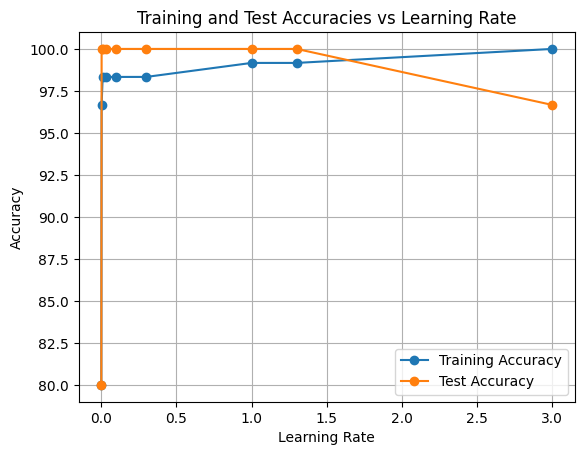

In [52]:
# Check different choices of learning rates

learning_rates_choices = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 1.3, 3.0]
training_accuracies = []; test_accuracies = []

for learning_rate in learning_rates_choices:
    
    cost, parameters = nn_model(X_train.T, y_train.T, 4, learning_rate, num_iterations=10000, print_cost=False)
    training_accuracies.append(predict(parameters, X_train.T, y_train))
    test_accuracies.append(predict(parameters, X_test.T, y_test))

plt.plot(learning_rates_choices, training_accuracies, label='Training Accuracy', marker='o')
plt.plot(learning_rates_choices, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies vs Learning Rate')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
"""
With learning rate, first experimenting with rates starting at 0.001 and increasing them 3 fold always \
    and finding a learning rate at which the cost decreases slowly and one at the cost increases rapidly
    can help us identify the limits within which our optimal rate can be found. In this case, after experimenting,
    I found the limits to be 1 and 3. And after trying different choices between 1 and 3, I found 1.3 to be the best
    after multiple attempts.
And indeed as the graph above shows, 1.3 performs best for our use case. 
"""

'\nWith learning rate, first experimenting with rates starting at 0.001 and increasing them 3 fold always     and finding a learning rate at which the cost decreases slowly and one at the cost increases rapidly\n    can help us identify the limits within which our optimal rate can be found. In this case, after experimenting,\n    I found the limits to be 1 and 3. And after trying different choices between 1 and 3, I found 1.3 to be the best\n    after multiple attempts.\nAnd indeed as the graph above shows, 1.3 performs best for our use case. \n'

Let's perform a comparitive analysis on the different choices of number of iterations and observe how it affects the model's performance

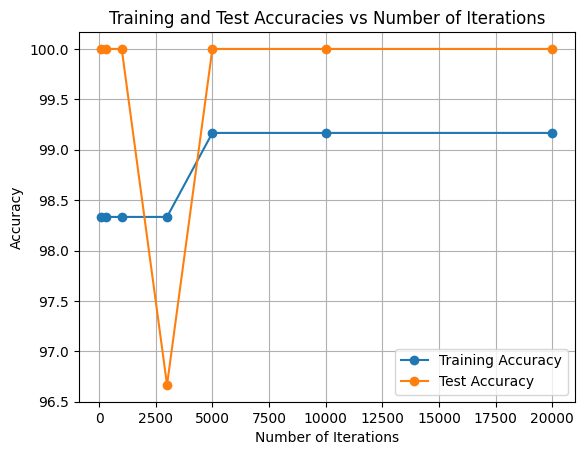

In [54]:
# Check different choices of number of iterations

iterations_choices = [100, 300, 1000, 3000, 5000, 10000, 20000]
training_accuracies = []; test_accuracies = []

for num_iterations in iterations_choices:
    
    cost, parameters = nn_model(X_train.T, y_train.T, 4, 1.3, num_iterations=num_iterations, print_cost=False)
    training_accuracies.append(predict(parameters, X_train.T, y_train))
    test_accuracies.append(predict(parameters, X_test.T, y_test))

plt.plot(iterations_choices, training_accuracies, label='Training Accuracy', marker='o')
plt.plot(iterations_choices, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies vs Number of Iterations')
plt.legend()
plt.grid(True)
plt.show()


In [55]:
"""
With this we can see that the number of iterations can be something much less than 10000 and the train and test accuracies will\
    still be good. Which means it's worth considering trying much smaller values for the number of iterations. 
"""

"\nWith this we can see that the number of iterations can be something much less than 10000 and the train and test accuracies will    still be good. Which means it's worth considering trying much smaller values for the number of iterations. \n"